##  Libraries for preprocessing

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.dates as md
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pylab import rcParams
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### reading the data and converting object to timestamp

In [ ]:
df = pd.read_csv("C:\\Users\\raksh\\Desktop\\data.csv", error_bad_lines=False)
pd.to_datetime(df["timestamp"], infer_datetime_format=True)
df.head()

,timestamp,value
0,2014-05-14 01:14:00,85.835
1,2014-05-14 01:19:00,88.167
2,2014-05-14 01:24:00,44.595
3,2014-05-14 01:29:00,56.282
4,2014-05-14 01:34:00,36.534


In [ ]:
df

,timestamp,value
0,2014-05-14 01:14:00,85.835
1,2014-05-14 01:19:00,88.167
2,2014-05-14 01:24:00,44.595
3,2014-05-14 01:29:00,56.282
4,2014-05-14 01:34:00,36.534
...,...,...
18045,2014-07-15 16:59:00,13.498
18046,2014-07-15 17:04:00,19.831
18047,2014-07-15 17:09:00,27.165
18048,2014-07-15 17:14:00,12.873


### 1st day and last day of the dataset

In [ ]:
df['timestamp'].min(), df['timestamp'].max()

('2014-05-14 01:14:00', '2014-07-15 17:19:00')

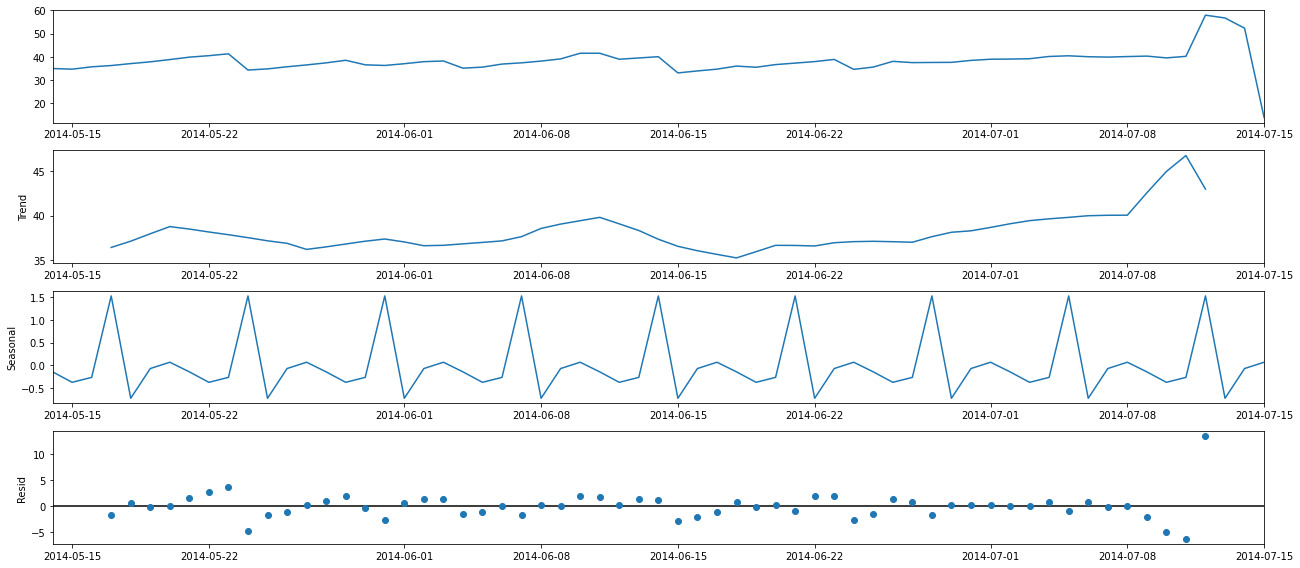

In [ ]:
df_temp = df
df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp'])
df_temp = df_temp.set_index("timestamp")

resamp = df_temp.resample('D').mean()

rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(resamp, model='additive')
fig = decomposition.plot()
plt.show()

### sort data according to time and convert time into seconds/minutes

In [ ]:
df = df.sort_values('timestamp')
df.dtypes
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date_time_int'] = df.timestamp.astype(np.int64)

In [ ]:
data = df[['value']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train oneclassSVM 
outliers_fraction=0.01
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(data)
 
df['anomaly_svm'] = pd.Series(model.predict(data))
fig, ax = plt.subplots(figsize=(25,6))

a = df.loc[df['anomaly_svm'] == -1, ['date_time_int', 'value']] #anomaly

ax.plot(df['date_time_int'], df['value'], color='teal', label ='Normal')
ax.scatter(a['date_time_int'],a['value'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

NameError: name 'StandardScaler' is not defined

In [ ]:
a = df.loc[df['anomaly_svm'] == 1, 'value']
b = df.loc[df['anomaly_svm'] == -1, 'value']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

In [ ]:
df[df['anomaly_svm']==-1]

In [ ]:
fig, ax = plt.subplots(figsize=(25,6))
a_no = df.loc[df['timestamp'] > '2014-07-10 00:04:00']
a = df.loc[df['anomaly_svm'] == -1, ['timestamp', 'value']] #anomaly

# a = df.loc[df['timestamp'] > '2014-07-11 00:04:00']

ax.plot(a_no['timestamp'], a_no['value'], color='blue', label = 'Normal')
ax.scatter(a['timestamp'],a['value'], color='red', label = 'Anomaly')
plt.legend()
plt.show();